In [43]:
import pandas as pd
from IPython.display import display

df = pd.read_csv(r'C:\Users\sound\OneDrive\Desktop\main project\python project main\supervised classification type dataset\winequality-red.csv', sep=';')
display(df)
print(df)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [44]:
# Check for missing values

missing_values = df.isna().sum()
print(missing_values)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [45]:
from collections import Counter

import numpy as np

def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3st quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier Step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces 
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 1.5) 
    
    return multiple_outliers

print("number of outliers detected --> ",len(df.loc[detect_outliers(df,df.columns[:-1])]))
df.loc[detect_outliers(df,df.columns[:-1])]


number of outliers detected -->  120


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
294,13.3,0.340,0.52,3.2,0.094,17.0,53.0,1.00140,3.05,0.81,9.500000,6
338,12.4,0.490,0.58,3.0,0.103,28.0,99.0,1.00080,3.16,1.00,11.500000,6
339,12.5,0.280,0.54,2.3,0.082,12.0,29.0,0.99970,3.11,1.36,9.800000,7
353,13.5,0.530,0.79,4.8,0.120,23.0,77.0,1.00180,3.18,0.77,13.000000,5
364,12.8,0.615,0.66,5.8,0.083,7.0,42.0,1.00220,3.07,0.73,10.000000,7
...,...,...,...,...,...,...,...,...,...,...,...,...
1228,5.1,0.420,0.00,1.8,0.044,18.0,88.0,0.99157,3.68,0.73,13.600000,7
1269,5.5,0.490,0.03,1.8,0.044,28.0,87.0,0.99080,3.50,0.82,14.000000,8
1270,5.0,0.380,0.01,1.6,0.048,26.0,60.0,0.99084,3.70,0.75,14.000000,6
1475,5.3,0.470,0.11,2.2,0.048,16.0,89.0,0.99182,3.54,0.88,13.566667,7


In [46]:
data = df.drop(detect_outliers(df,df.columns[:-1]),axis = 0).reset_index(drop = True)

Outliers are removed

In [47]:
data.describe(include="all")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1479.000000,1479.000000,1479.000000,1479.000000,1479.000000,1479.000000,1479.000000,1479.000000,1479.000000,1479.000000,1479.000000,1479.000000
mean,8.275930,0.526937,0.261873,2.415957,0.082278,15.267410,43.843813,0.996692,3.319554,0.641494,10.416148,5.643002
std,1.625404,0.174377,0.188784,1.063313,0.026046,9.592774,29.628152,0.001676,0.143039,0.132964,1.018823,0.798131
min,4.600000,0.120000,0.000000,1.200000,0.038000,1.000000,6.000000,0.991500,2.880000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995600,3.220000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,36.000000,0.996700,3.320000,0.610000,10.200000,6.000000
75%,9.200000,0.640000,0.410000,2.600000,0.088500,21.000000,59.000000,0.997800,3.400000,0.710000,11.100000,6.000000
max,15.000000,1.330000,0.780000,13.900000,0.387000,54.000000,155.000000,1.001000,4.010000,1.560000,14.000000,8.000000


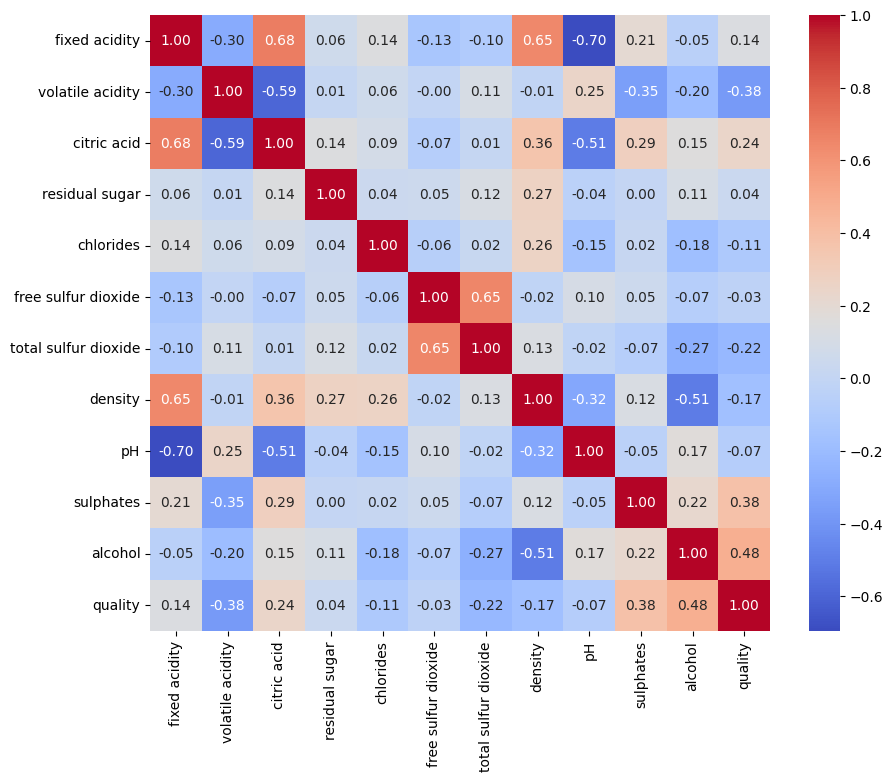

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


Alcohol is the most important physicochemical test for predicting wine quality.
Total sulfur dioxide is also a very important physicochemical test for predicting wine quality.
Volatile acidity, pH, and citric acid are also correlated with wine quality, but to a lesser extent.

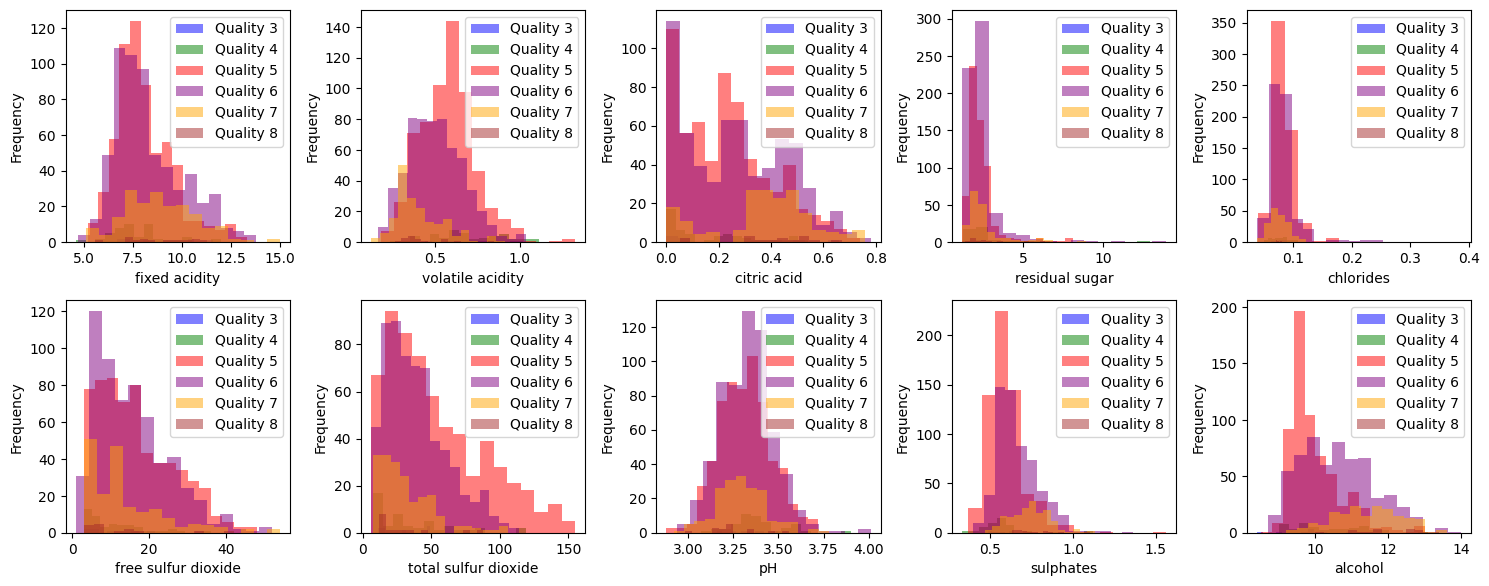

In [49]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is your DataFrame containing the features and 'quality' column
# Replace this with your actual DataFrame

# Get the list of feature names, excluding 'density'
features = [col for col in data.columns if col != 'density' and col != 'quality']

# Define colors for each quality level
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink']

# Create subplots
fig, axes = plt.subplots(2, 5, figsize=(15, 6))  # 2 rows, 5 columns of subplots

for i, feature in enumerate(features):
    row = i // 5
    col = i % 5

    # Create histograms with different colors for each quality level
    for q, color in zip(range(3, 9), colors):
        axes[row, col].hist(data[data['quality'] == q][feature], alpha=0.5, color=color, label=f'Quality {q}', bins=15)

    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [50]:
import pandas as pd

# Assuming 'data' is your DataFrame
result = data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'quality']].groupby(["quality"], as_index=False).mean().sort_values(by="quality")


# Apply background gradient
styled_result = result.style.background_gradient("Reds")

# Display the styled DataFrame
styled_result


,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates
0,3,8.575000,0.760000,0.213750,2.500000,0.123875,12.500000,28.250000,0.997910,3.356250,0.595000
1,4,7.781250,0.690000,0.156667,2.668750,0.078875,11.041667,34.750000,0.996551,3.389167,0.571042
2,5,8.109807,0.575635,0.231608,2.372267,0.084318,16.027331,53.617363,0.996996,3.316543,0.593167
3,6,8.293355,0.501013,0.265698,2.373339,0.082022,15.384551,39.014950,0.996578,3.326080,0.664120
4,7,8.858696,0.402636,0.369674,2.610870,0.076266,13.771739,30.858696,0.996120,3.294511,0.741359
5,8,8.740000,0.426667,0.403333,2.693333,0.070400,12.400000,29.066667,0.995508,3.247333,0.762667


In [51]:
bins = (2, 6.5, 8)
labels = [0, 1]
data['quality'] = pd.cut(x = data['quality'], bins = bins, labels = labels)
data['quality'].value_counts()


quality
0    1280
1     199
Name: count, dtype: int64

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split

feature_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates']

X = data[feature_columns]
y = data['quality']

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the data
display('X_train: ')
display(X_train.head())
display('X_test: ')
display(X_test.head())
display('y_train: ')
display(y_train.head())
display('y_test: ')
display(y_test.head())


'X_train: '

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates
405,9.2,0.630,0.21,2.7,0.097,29.0,65.0,0.9988,3.28,0.58
478,8.1,0.825,0.24,2.1,0.084,5.0,13.0,0.9972,3.37,0.77
598,10.8,0.400,0.41,2.2,0.084,7.0,17.0,0.9984,3.08,0.67
1178,7.1,0.460,0.20,1.9,0.077,28.0,54.0,0.9956,3.37,0.64
528,11.9,0.580,0.58,1.9,0.071,5.0,18.0,0.9980,3.09,0.63


'X_test: '

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates
661,11.6,0.410,0.58,2.8,0.096,25.0,101.0,1.00024,3.13,0.53
274,7.6,0.620,0.32,2.2,0.082,7.0,54.0,0.99660,3.36,0.52
394,9.5,0.735,0.10,2.1,0.079,6.0,31.0,0.99860,3.23,0.56
218,8.2,0.600,0.17,2.3,0.072,11.0,73.0,0.99630,3.20,0.45
922,8.9,0.320,0.31,2.0,0.088,12.0,19.0,0.99570,3.17,0.55


'y_train: '

405     0
478     0
598     0
1178    0
528     0
Name: quality, dtype: category
Categories (2, int64): [0 < 1]

'y_test: '

661    0
274    0
394    0
218    0
922    0
Name: quality, dtype: category
Categories (2, int64): [0 < 1]

In [53]:
print('Shape of X-train:', X_train.shape)
print('Shape of X-test:', X_test.shape)
print('Shape of y-test:', y_train.shape)
print('Shape of y-test:', y_test.shape)

Shape of X-train: (1183, 10)
Shape of X-test: (296, 10)
Shape of y-test: (1183,)
Shape of y-test: (296,)


In [54]:
import collections
from imblearn.over_sampling import SMOTE

# Initialize the SMOTE object
smote = SMOTE(random_state=42)

# Resample the training data
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("Before smote --> ", collections.Counter(y_train))
print("After smote --> ", collections.Counter(y_resampled))

Before smote -->  Counter({0: 1022, 1: 161})
After smote -->  Counter({0: 1022, 1: 1022})


In [55]:
from sklearn.discriminant_analysis import StandardScaler


scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled) 
X_test = scaler.transform(X_test) 
results = []

In [56]:
from sklearn.linear_model import LinearRegression

# Assuming X_resampled, y_resampled are your training data
regressor = LinearRegression()
regressor.fit(X_resampled, y_resampled)

# Assuming X_test is your test data
y_pred_regression = regressor.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred_regression)
mse = mean_squared_error(y_test, y_pred_regression)
r2 = r2_score(y_test, y_pred_regression)

print(f'LinearRegression Mean Absolute Error: {mae}')
print(f'LinearRegression Mean Squared Error: {mse}')
print(f'LinearRegression R-squared (R2): {r2}')


LinearRegression Mean Absolute Error: 0.3187746663850964
LinearRegression Mean Squared Error: 0.17228490946495797
LinearRegression R-squared (R2): -0.5396689746717418


In [57]:
from sklearn.svm import SVR

# Assuming X_resampled, y_resampled are your training data
svr = SVR(kernel='rbf')  # You can experiment with different kernels (e.g., 'linear', 'poly')
svr.fit(X_resampled, y_resampled)

# Assuming X_test is your test data
y_pred_regression = svr.predict(X_test)

# Now you have continuous predictions. You can evaluate the performance using regression metrics.
# For example, you can use Mean Absolute Error (MAE), Mean Squared Error (MSE), R-squared (R2), etc.
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred_regression)
mse = mean_squared_error(y_test, y_pred_regression)
r2 = r2_score(y_test, y_pred_regression)

print(f'SVR Mean Absolute Error: {mae}')
print(f'SVR Mean Squared Error: {mse}')
print(f'SVR R-squared (R2): {r2}')


SVR Mean Absolute Error: 0.26241785859097283
SVR Mean Squared Error: 0.14421265347113751
SVR R-squared (R2): -0.2887939459942046


In [58]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize and train the DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(X_resampled, y_resampled)

# Predict using the trained model
y_pred_regression = dt_regressor.predict(X_test)

# Evaluate the performance using regression metrics
mae = mean_absolute_error(y_test, y_pred_regression)
mse = mean_squared_error(y_test, y_pred_regression)
r2 = r2_score(y_test, y_pred_regression)

print(f'DecisionTreeRegressor Mean Absolute Error: {mae}')
print(f'DecisionTreeRegressor Mean Squared Error: {mse}')
print(f'DecisionTreeRegressor R-squared (R2): {r2}')



DecisionTreeRegressor Mean Absolute Error: 0.17905405405405406
DecisionTreeRegressor Mean Squared Error: 0.17905405405405406
DecisionTreeRegressor R-squared (R2): -0.60016319869441


In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize and train the RandomForestRegressor
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_resampled, y_resampled)

# Predict using the trained model
y_pred_regression = rf_regressor.predict(X_test)

# Evaluate the performance using regression metrics
mae = mean_absolute_error(y_test, y_pred_regression)
mse = mean_squared_error(y_test, y_pred_regression)
r2 = r2_score(y_test, y_pred_regression)

print(f'RandomForestRegressor Mean Absolute Error: {mae}')
print(f'RandomForestRegressor Mean Squared Error: {mse}')
print(f'RandomForestRegressor R-squared (R2): {r2}')


RandomForestRegressor Mean Absolute Error: 0.20996621621621622
RandomForestRegressor Mean Squared Error: 0.1217456081081081
RandomForestRegressor R-squared (R2): -0.08801134230926122


In [60]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize and train the GradientBoostingRegressor
gb_regressor = GradientBoostingRegressor()
gb_regressor.fit(X_resampled, y_resampled)

# Predict using the trained model
y_pred_regression = gb_regressor.predict(X_test)

# Evaluate the performance using regression metrics
mae = mean_absolute_error(y_test, y_pred_regression)
mse = mean_squared_error(y_test, y_pred_regression)
r2 = r2_score(y_test, y_pred_regression)

print(f'GradientBoostingRegressor Mean Absolute Error: {mae}')
print(f'GradientBoostingRegressor Mean Squared Error: {mse}')
print(f'GradientBoostingRegressor R-squared (R2): {r2}')


GradientBoostingRegressor Mean Absolute Error: 0.25566713978376426
GradientBoostingRegressor Mean Squared Error: 0.13395389073379196
GradientBoostingRegressor R-squared (R2): -0.19711384032353263


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize and train the AdaBoostRegressor
abr = AdaBoostRegressor()
abr.fit(X_resampled, y_resampled)

# Predict using the trained model
y_pred_regression = abr.predict(X_test)

# Evaluate the performance using regression metrics
mae = mean_absolute_error(y_test, y_pred_regression)
mse = mean_squared_error(y_test, y_pred_regression)
r2 = r2_score(y_test, y_pred_regression)

print(f'AdaBoostRegressor Mean Absolute Error: {mae}')
print(f'AdaBoostRegressor Mean Squared Error: {mse}')
print(f'AdaBoostRegressor R-squared (R2): {r2}')


AdaBoostRegressor Mean Absolute Error: 0.334378831953926
AdaBoostRegressor Mean Squared Error: 0.14908158638777383
AdaBoostRegressor R-squared (R2): -0.33230643338955423


In [77]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


# Initialize and train the XGBRegressor
xgb_regressor = XGBRegressor()
xgb_regressor.fit(X_resampled, y_resampled)

# Predict using the trained model
y_pred_xgb = xgb_regressor.predict(X_test)

# Evaluate the performance using regression metrics
mae = mean_absolute_error(y_test, y_pred_xgb)
mse = mean_squared_error(y_test, y_pred_xgb)
r2 = r2_score(y_test, y_pred_xgb)

print(f'xgb_regressor Mean Absolute Error: {mae}')
print(f'xgb_regressor Mean Squared Error: {mse}')
print(f'xgb_regressor R-squared (R2): {r2}')

# Load the new data
new_data = {
    'fixed acidity': [5, 5.7, 5.9, 8, 8.4, 7, 9, 7.2, 8, 8, 9.5, 7, 7.4, 7.8],
    'volatile acidity': [0.32, 0.38, 0.44, 0.5, 0.56, 0.28, 0.34, 0.4, 0.46, 0.52, 0.58, 0.36, 0.42, 0.48],
    'citric acid': [0.35, 0.4, 0.45, 0.5, 0.55, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.4, 0.45, 0.5],
    'residual sugar': [2.2, 2.4, 2.6, 2.8, 3, 2, 2.2, 2.4, 2.6, 2.8, 3, 2.2, 2.4, 2.6],
    'chlorides': [0.021, 0.025, 0.029, 0.033, 0.037, 0.019, 0.023, 0.027, 0.031, 0.035, 0.039, 0.021, 0.025, 0.029],
    'free sulfur dioxide': [33, 35, 37, 39, 41, 31, 33, 35, 37, 39, 41, 34, 36, 38],
    'total sulfur dioxide': [160, 175, 190, 205, 220, 155, 165, 180, 195, 210, 225, 170, 185, 200],
    'density': [0.997, 0.998, 0.999, 1, 1.001, 0.996, 0.997, 0.998, 0.999, 1, 1.001, 0.997, 0.998, 0.999],
    'pH': [3.3, 3.2, 3.1, 3, 2.9, 3.4, 3.3, 3.2, 3.1, 3, 2.9, 3.3, 3.2, 3.1],
    'sulphates': [0.65, 0.7, 0.75, 0.8, 0.85, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.7, 0.75, 0.8]
}

# Create a DataFrame
new_df = pd.DataFrame(new_data)


xgb_regressor = XGBRegressor()
xgb_regressor.fit(X, y)

# Make predictions on the new data
y_pred_new = xgb_regressor.predict(new_df)

print("Predicted quality for new data:")
print(y_pred_new)

xgb_regressor Mean Absolute Error: 0.1947024872753556
xgb_regressor Mean Squared Error: 0.10983306495641444
xgb_regressor R-squared (R2): 0.01844820285381421
Predicted quality for new data:
[ 0.5841145   0.01108538  0.15935528 -0.05369837 -0.03180886  0.4427949
  0.44771138  0.12001605  0.20767985 -0.05393723  0.05041834  0.09521434
  0.16250607  0.20711446]
